In [1]:
import airline
import environment

import os
import ray
from ray import air, tune
from ray import tune
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.algorithms.ddpg import DDPGConfig
from ray.rllib.algorithms.dqn import DQNConfig
from ray.rllib.env import PettingZooEnv
from ray.tune.registry import register_env
import multiprocessing


2023-10-05 22:42:48,559	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!
2023-10-05 22:42:48,627	WARNING deprecation.py:50 -- DeprecationWarning: `build_tf_policy` has been deprecated. This will raise an error in the future!
2023-10-05 22:42:48,629	WARNING deprecation.py:50 -- DeprecationWarning: `build_policy_class` has been deprecated. This will raise an error in the future!


In [21]:
def simulate(n=300, action=airline.DEFAULT_POLICY):
    dfs = airline.get_df()
    print(airline.CONFIG)
    sim = airline.Simulator(airline.CONFIG, dfs, add_flights=True, save_history=True)

    actions = {x:action for x in sim.airports}
    # for i in range(30000):
    for i in range(n):
        sim.step()
    return sim.history

In [22]:
def chart(history):
    import pandas as pd
    data = { 
        i:{
            **{k:x[k] for k in ["incoming_count","incoming_delay","outgoing_count","outgoing_delay","policy"]},
            "landed_count":{k : len(v) for k,v in x["landed"].items()},
            "landed_delay":{k : sum(max(0,y["takeoff_ready"]-y["takeoff_plan"]) for y in v.values()) for k,v in x["landed"].items()},
        }
        for i, x in history.items() if (i != "current")
    }
    df = pd.Series({(k,kk,kkk):vvv for k,v in data.items() for kk, vv in v.items() for kkk, vvv in vv.items()}).unstack()

    df_RKSI = df["RKSI"].unstack()
    df_RKSI["policy"].plot()
    (df_RKSI[["incoming_delay","outgoing_delay","landed_delay"]].divide(df_RKSI[["incoming_count","outgoing_count","landed_count"]].values+0.01)).plot()

{'std_delay': 10, 'late_threshold': 15, 'holding_period': 120, 'timestep': 10, 'capacity': 10, 'num_plane': 100, 'num_iters': 30000, 'agent_airports': ['RKSI', 'RKSS', 'RKPK', 'RKPC', 'RKTN', 'RKTU', 'RKJB'], 'debug': False}


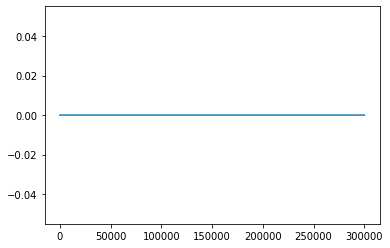

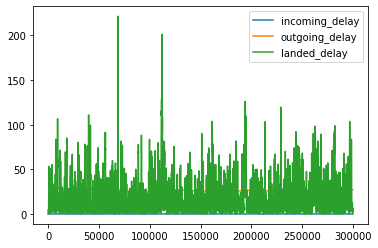

In [26]:
chart(simulate(n=30000, action=0))

{'std_delay': 10, 'late_threshold': 15, 'holding_period': 120, 'timestep': 10, 'capacity': 10, 'num_plane': 100, 'num_iters': 30000, 'agent_airports': ['RKSI', 'RKSS', 'RKPK', 'RKPC', 'RKTN', 'RKTU', 'RKJB'], 'debug': False}


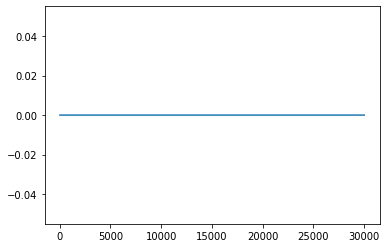

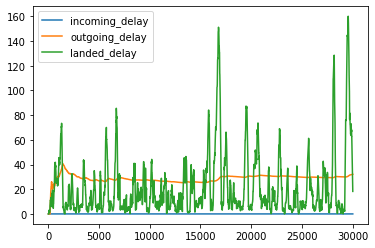

In [28]:
chart(simulate(n=3000, action=1))

{'std_delay': 10, 'late_threshold': 15, 'holding_period': 120, 'timestep': 10, 'capacity': 10, 'num_plane': 100, 'num_iters': 30000, 'agent_airports': ['RKSI', 'RKSS', 'RKPK', 'RKPC', 'RKTN', 'RKTU', 'RKJB'], 'debug': False}


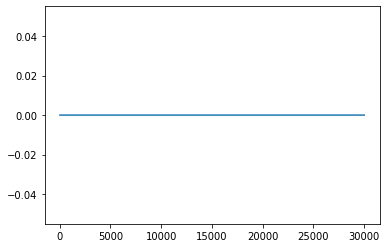

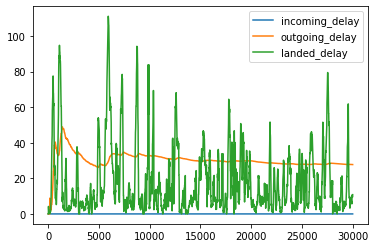

In [27]:
chart(simulate(n=3000, action=2))